In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('C:\\Users\\Chris\\OneDrive\\Documents\\ECE 143\\project\\ObesityDataSet_raw_and_data_sinthetic.csv')
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
dataset['BMI'] = dataset['Weight']/(dataset['Height']**2)
dataset = dataset[['Gender', 'Age', 'Height','BMI',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad']]
#Check if the new column was calculated and placed correctly
dataset.head()

,Gender,Age,Height,BMI,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,24.386526,no,2.0,3.0,Sometimes,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,24.238227,no,3.0,3.0,Sometimes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,23.765432,no,2.0,3.0,Sometimes,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,26.851852,no,3.0,3.0,Sometimes,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,28.342381,no,2.0,1.0,Sometimes,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
dataset1 = dataset.dropna()

In [5]:
dataset1

,Gender,Age,Height,BMI,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,24.386526,no,2.0,3.0,Sometimes,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,24.238227,no,3.0,3.0,Sometimes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,23.765432,no,2.0,3.0,Sometimes,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,26.851852,no,3.0,3.0,Sometimes,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,28.342381,no,2.0,1.0,Sometimes,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,44.901475,yes,3.0,3.0,Sometimes,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,43.741923,yes,3.0,3.0,Sometimes,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,43.543817,yes,3.0,3.0,Sometimes,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,44.071535,yes,3.0,3.0,Sometimes,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
X = dataset.iloc[:,:14]
Y = dataset.iloc[:,[14]]

In [7]:
X

,Gender,Age,Height,BMI,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,24.386526,no,2.0,3.0,Sometimes,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,24.238227,no,3.0,3.0,Sometimes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,23.765432,no,2.0,3.0,Sometimes,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,26.851852,no,3.0,3.0,Sometimes,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,28.342381,no,2.0,1.0,Sometimes,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,44.901475,yes,3.0,3.0,Sometimes,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,43.741923,yes,3.0,3.0,Sometimes,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,43.543817,yes,3.0,3.0,Sometimes,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,44.071535,yes,3.0,3.0,Sometimes,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [8]:
Y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [9]:
lEncoder = LabelEncoder()
columns_to_encode = [0,4,7,9,12,13,14]
encoded = dataset.iloc[:, columns_to_encode].apply(lambda col: lEncoder.fit_transform(col))

# Assign the transformed values back to the original DataFrame
dataset.iloc[:, columns_to_encode] = encoded

C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [10]:
dataset

,Gender,Age,Height,BMI,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,24.386526,0,2.0,3.0,2,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,24.238227,0,3.0,3.0,2,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,23.765432,0,2.0,3.0,2,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,26.851852,0,3.0,3.0,2,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,28.342381,0,2.0,1.0,2,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,44.901475,1,3.0,3.0,2,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,43.741923,1,3.0,3.0,2,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,43.543817,1,3.0,3.0,2,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,44.071535,1,3.0,3.0,2,2.852339,0,1.139107,0.586035,2,3,4


In [11]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(dataset)
cols = [['Gender', 'Age', 'Height','BMI',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad']]
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

  Gender       Age    Height       BMI FAVC FCVC       NCP      CAEC CH2O  \
0    0.0  0.148936  0.320755  0.301162  0.0  0.5  0.666667  0.666667  0.5   
1    0.0  0.148936  0.132075  0.297240  0.0  1.0  0.666667  0.666667  1.0   
2    1.0  0.191489  0.660377  0.284736  0.0  0.5  0.666667  0.666667  0.5   
3    1.0  0.276596  0.660377  0.366359  0.0  1.0  0.666667  0.666667  0.5   
4    1.0  0.170213  0.622642  0.405778  0.0  0.5  0.000000  0.666667  0.5   

   SCC       FAF  TUE      CALC MTRANS NObeyesdad  
0  0.0  0.000000  0.5  1.000000   0.75   0.166667  
1  1.0  1.000000  0.0  0.666667   0.75   0.166667  
2  0.0  0.666667  0.5  0.333333   0.75   0.166667  
3  0.0  0.666667  0.0  0.333333   1.00   0.833333  
4  0.0  0.000000  0.0  0.666667   0.75   1.000000  


<AxesSubplot:>

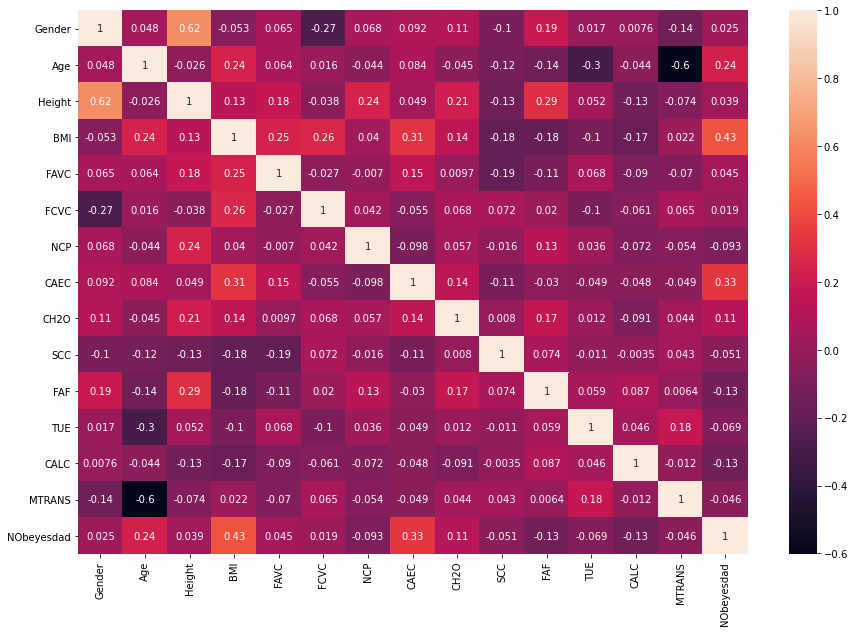

In [12]:
dataset.corr()
#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot = True)

In [13]:
#Store the feature and target variable
X = normalizedData.iloc[:, :-1]
y = Y

print(normalizedData.shape)
print(X.shape)
print(y.shape)

#Partition the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)


(2111, 15)
(2111, 14)
(2111, 1)


In [20]:
print(X_train.columns)
print(y_train.columns)
X_train.columns = ['_'.join(map(str, col)).replace(' ', '_') for col in X_train.columns]

# Check the updated column names
print(X_train.columns)

MultiIndex([('Gender',),
            (   'Age',),
            ('Height',),
            (   'BMI',),
            (  'FAVC',),
            (  'FCVC',),
            (   'NCP',),
            (  'CAEC',),
            (  'CH2O',),
            (   'SCC',),
            (   'FAF',),
            (   'TUE',),
            (  'CALC',),
            ('MTRANS',)],
           )
Index(['NObeyesdad'], dtype='object')
Index(['Gender', 'Age', 'Height', 'BMI', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O',
       'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')


In [21]:
# Compute the baseline classification accuracy for X_train
!pip install lightgbm
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 1477, number of used features: 14
[LightGBM] [Info] Start training from score -2.072022
[LightGBM] [Info] Start training from score -2.029910
[LightGBM] [Info] Start training from score -1.780315
[LightGBM] [Info] Start training from score -1.955434
[LightGBM] [Info] Start training from score -1.877233
[LightGBM] [Info] Start training from score -1.989501
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier()

In [22]:
y_pred=clf.predict(X_test)
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9826


In [23]:
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84  2  0  0  0  0  0]
 [ 0 92  0  0  0  1  0]
 [ 0  0 99  2  0  0  1]
 [ 0  0  1 87  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  2  0  0  0 85  1]
 [ 0  0  0  0  0  0 79]]

True Positives(TP) =  84

True Negatives(TN) =  92

False Positives(FP) =  2

False Negatives(FN) =  0


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        86
      Normal_Weight       0.96      0.99      0.97        93
     Obesity_Type_I       0.99      0.97      0.98       102
    Obesity_Type_II       0.97      0.99      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.99      0.97      0.98        88
Overweight_Level_II       0.98      1.00      0.99        79

           accuracy                           0.98       634
          macro avg       0.98      0.98      0.98       634
       weighted avg       0.98      0.98      0.98       634



<AxesSubplot:>

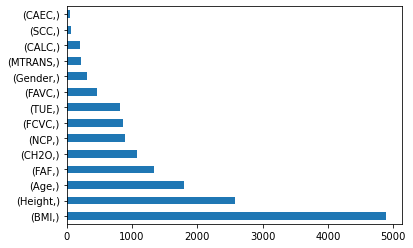

In [26]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', )